In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# To see all columns in print

pd.options.display.max_columns = None

In [3]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [4]:
# preprocessing to get the original data with all categorical variable

cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [5]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [6]:
cluster_2016['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [7]:
# ! pip install kmodes
# ! pip install --upgrade pip
# ! pip install category_encoders

## Why choose label encoding with other 3 other encoding

* Label encoding uses for features VEHICLE_HAL_ID,	START_RENTAL_ZONE,	END_RENTAL_ZONE.
* As these features have lots of classes. If we use other encoding the dimention of the dataset is too big too handle.
* For CITY_RENTAL_ZONE,	TECHNICAL_INCOME_CHANNEL,	Ride_Duration_new,	Month we choose 3 encoding as these have small classes.
* And these encoding doesn't produce sparse matrix. 


# Implementation

In [8]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [9]:
# converting all categorcal variable to dummy encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


# Approach #1 - Backward Difference Coding

In [10]:
import category_encoders as ce

# Get a new clean dataframe
# cluster_2016 = cluster_2016.select_dtypes(exclude=['float64'])

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)

# Only display the first 5 columns for brevity
backd_df = encoder.transform(cluster_2016)
backd_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1794,796,115,28.800000
1,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1574,683,318,27.050000
2,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,6517,422,377,11.216667
3,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,0.333333,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,5127,401,437,75.383333
4,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.06666

In [11]:
# To convert the value into numpy array

backd_df_val = backd_df.iloc[:, 0:].values

In [13]:
# printing the first array of features

backd_df_val[0]

array([ 1.00000000e+00, -9.77777778e-01, -9.55555556e-01, -9.33333333e-01,
       -9.11111111e-01, -8.88888889e-01, -8.66666667e-01, -8.44444444e-01,
       -8.22222222e-01, -8.00000000e-01, -7.77777778e-01, -7.55555556e-01,
       -7.33333333e-01, -7.11111111e-01, -6.88888889e-01, -6.66666667e-01,
       -6.44444444e-01, -6.22222222e-01, -6.00000000e-01, -5.77777778e-01,
       -5.55555556e-01, -5.33333333e-01, -5.11111111e-01, -4.88888889e-01,
       -4.66666667e-01, -4.44444444e-01, -4.22222222e-01, -4.00000000e-01,
       -3.77777778e-01, -3.55555556e-01, -3.33333333e-01, -3.11111111e-01,
       -2.88888889e-01, -2.66666667e-01, -2.44444444e-01, -2.22222222e-01,
       -2.00000000e-01, -1.77777778e-01, -1.55555556e-01, -1.33333333e-01,
       -1.11111111e-01, -8.88888889e-02, -6.66666667e-02, -4.44444444e-02,
       -2.22222222e-02,  1.00000000e+00, -8.33333333e-01, -6.66666667e-01,
       -5.00000000e-01, -3.33333333e-01, -1.66666667e-01,  1.00000000e+00,
       -8.33333333e-01, -

In [14]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmeans = KMeans(n_clusters=7, random_state=0,verbose=3).fit(backd_df_val)
clusters = kmeans.fit_predict(backd_df_val)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 986269497251.3689
start iteration
done sorting
end inner loop
Iteration 1, inertia 923369168848.9878
start iteration
done sorting
end inner loop
Iteration 2, inertia 908060238204.1228
start iteration
done sorting
end inner loop
Iteration 3, inertia 899484960589.462
start iteration
done sorting
end inner loop
Iteration 4, inertia 893997168944.7755
start iteration
done sorting
end inner loop
Iteration 5, inertia 890070730765.1031
start iteration
done sorting
end inner loop
Iteration 6, inertia 887417998737.1392
start iteration
done sorting
end inner loop
Iteration 7, inertia 885777635756.4214
start iteration
done sorting
end inner loop
Iteration 8, inertia 884637664872.4484
start iteration
done sorting
end inner loop
Iteration 9, inertia 883829691059.1761
start iteration
done sorting
end inner loop
Iteration 10, inertia 883248450009.058
start iteration
done sorting
end inner loop
Iteration 11, inerti

Iteration 38, inertia 865552365335.7352
start iteration
done sorting
end inner loop
Iteration 39, inertia 865546720202.3483
start iteration
done sorting
end inner loop
Iteration 40, inertia 865542519143.7612
start iteration
done sorting
end inner loop
Iteration 41, inertia 865538294285.7506
start iteration
done sorting
end inner loop
Iteration 42, inertia 865534353484.257
start iteration
done sorting
end inner loop
Iteration 43, inertia 865531959809.9921
start iteration
done sorting
end inner loop
Iteration 44, inertia 865530312692.7013
center shift 3.164480e+00 within tolerance 1.272612e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 922544306412.5784
start iteration
done sorting
end inner loop
Iteration 1, inertia 896107365162.7609
start iteration
done sorting
end inner loop
Iteration 2, inertia 890568392607.2731
start iteration
done sorting
end inner loop
Iteration 3, inertia 886014031964.1229
start iteration
done sorting
end inner loop
I

Iteration 12, inertia 865248055314.6056
start iteration
done sorting
end inner loop
Iteration 13, inertia 865206115038.4426
start iteration
done sorting
end inner loop
Iteration 14, inertia 865169689802.9917
start iteration
done sorting
end inner loop
Iteration 15, inertia 865134632163.2142
start iteration
done sorting
end inner loop
Iteration 16, inertia 865107434745.063
start iteration
done sorting
end inner loop
Iteration 17, inertia 865087684586.4105
start iteration
done sorting
end inner loop
Iteration 18, inertia 865077690303.7075
start iteration
done sorting
end inner loop
Iteration 19, inertia 865073280909.2355
start iteration
done sorting
end inner loop
Iteration 20, inertia 865071375364.0284
center shift 3.205060e+00 within tolerance 1.272612e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 899551319699.28
start iteration
done sorting
end inner loop
Iteration 1, inertia 875011717129.7632
start iteration
done sorting
end inner loop
I

Iteration 9, inertia 883829691059.1761
start iteration
done sorting
end inner loop
Iteration 10, inertia 883248450009.058
start iteration
done sorting
end inner loop
Iteration 11, inertia 882853301186.7834
start iteration
done sorting
end inner loop
Iteration 12, inertia 882578740911.6371
start iteration
done sorting
end inner loop
Iteration 13, inertia 882335514170.9847
start iteration
done sorting
end inner loop
Iteration 14, inertia 882179021331.445
start iteration
done sorting
end inner loop
Iteration 15, inertia 882074961301.4761
start iteration
done sorting
end inner loop
Iteration 16, inertia 881959411651.556
start iteration
done sorting
end inner loop
Iteration 17, inertia 881886092136.749
start iteration
done sorting
end inner loop
Iteration 18, inertia 881844415278.2925
start iteration
done sorting
end inner loop
Iteration 19, inertia 881817320841.362
start iteration
done sorting
end inner loop
Iteration 20, inertia 881796160743.3707
start iteration
done sorting
end inner loo

Iteration 2, inertia 890568392607.2731
start iteration
done sorting
end inner loop
Iteration 3, inertia 886014031964.1229
start iteration
done sorting
end inner loop
Iteration 4, inertia 880652893654.416
start iteration
done sorting
end inner loop
Iteration 5, inertia 876382154169.1116
start iteration
done sorting
end inner loop
Iteration 6, inertia 873768438144.7631
start iteration
done sorting
end inner loop
Iteration 7, inertia 871808305962.6646
start iteration
done sorting
end inner loop
Iteration 8, inertia 870208010537.7717
start iteration
done sorting
end inner loop
Iteration 9, inertia 869078666743.7651
start iteration
done sorting
end inner loop
Iteration 10, inertia 868310398221.4097
start iteration
done sorting
end inner loop
Iteration 11, inertia 867648830386.7848
start iteration
done sorting
end inner loop
Iteration 12, inertia 867014570454.9473
start iteration
done sorting
end inner loop
Iteration 13, inertia 866497928186.5344
start iteration
done sorting
end inner loop
I

start iteration
done sorting
end inner loop
Iteration 0, inertia 899551319699.28
start iteration
done sorting
end inner loop
Iteration 1, inertia 875011717129.7632
start iteration
done sorting
end inner loop
Iteration 2, inertia 870517083479.4026
start iteration
done sorting
end inner loop
Iteration 3, inertia 868235170205.266
start iteration
done sorting
end inner loop
Iteration 4, inertia 866959619252.3812
start iteration
done sorting
end inner loop
Iteration 5, inertia 866269415609.0581
start iteration
done sorting
end inner loop
Iteration 6, inertia 865832565865.0237
start iteration
done sorting
end inner loop
Iteration 7, inertia 865524772989.4465
start iteration
done sorting
end inner loop
Iteration 8, inertia 865279238369.2743
start iteration
done sorting
end inner loop
Iteration 9, inertia 865170081711.2382
start iteration
done sorting
end inner loop
Iteration 10, inertia 865120436590.2013
start iteration
done sorting
end inner loop
Iteration 11, inertia 865093882466.4607
start

In [15]:
# cost in this encoding

kmeans.inertia_

865067070346.592

In [16]:
# predict all the labels

kmeans.predict(backd_df_val)

array([2, 2, 6, ..., 2, 4, 1], dtype=int32)

In [17]:
labels = kmeans.predict(backd_df_val)

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(backd_df_val)

In [19]:
%matplotlib inline

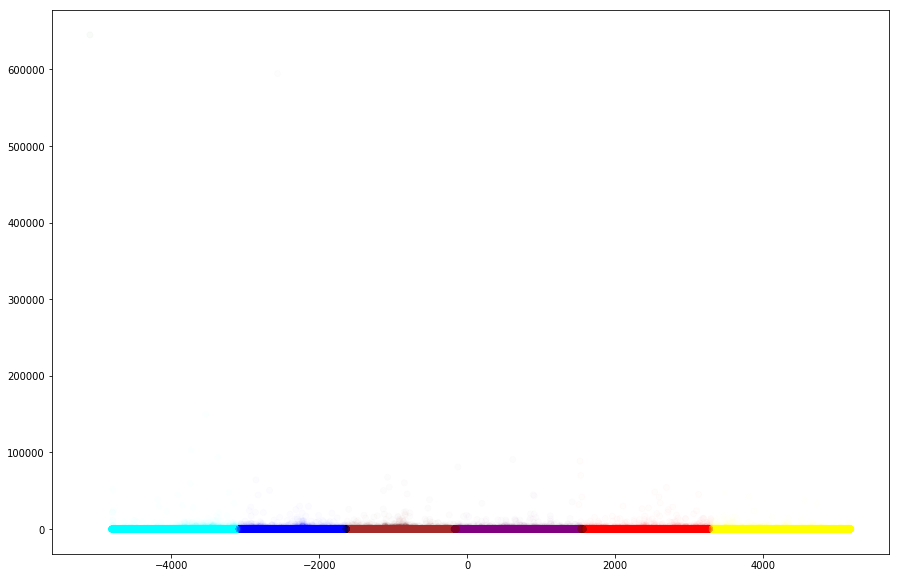

In [20]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [21]:
labels = [colors[l_] for l_ in labels]

In [22]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    343557
dtype: int64
blue 0    432429
dtype: int64
yellow 0    300637
dtype: int64
green 0    3
dtype: int64
purple 0    300330
dtype: int64
cyan 0    232997
dtype: int64
brown 0    390047
dtype: int64


# Approach #2 -Polynomial  Encoding

In [23]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [24]:
# converting all categorcal variable to dummy encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


In [25]:
encoder = ce.polynomial.PolynomialEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)
poly_df = encoder.transform(cluster_2016)

In [26]:
poly_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1794,796,115,28.800000
1,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.358569,-0.109109,0.521749,-0.566947,0.314970,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1574,683,318,27.050000
2,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.358569,-0.109109,0.521749,-0.566947,0.314970,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,6517,422,377,11.216667
3,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.119523,-0.436436,0.298142,0.377964,-0.629941,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,5127,401,437,75.383333
4,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0

In [27]:
# To convert the value into numpy array

poly_df = poly_df.iloc[:, 0:].values

In [28]:
poly_df[0]

array([ 1.00000000e+00, -2.52523496e-01,  3.11825384e-01, -3.45127457e-01,
        3.57969178e-01, -3.53969396e-01,  3.36502476e-01, -3.08995635e-01,
        2.74848963e-01, -2.37247046e-01,  1.98969421e-01, -1.62250503e-01,
        1.28709819e-01, -9.93538158e-02,  7.46374012e-02, -5.45661559e-02,
        3.88180365e-02, -2.68654294e-02,  1.80830729e-02, -1.18331498e-02,
        7.52442493e-03, -4.64674955e-03,  2.78514501e-03, -1.61900194e-03,
        9.11972154e-04, -4.97318484e-04,  2.62261844e-04, -1.33582175e-04,
        6.56247157e-05, -3.10456012e-05,  1.41174053e-05, -6.15771604e-06,
        2.56995408e-06, -1.02336556e-06,  3.87591215e-07, -1.38939759e-07,
        4.70594706e-08, -1.48720653e-08,  4.32676668e-09, -1.13702769e-09,
        2.03948949e-10, -1.91653581e-10,  1.26923384e-10,  7.65115610e-13,
        2.33622288e-11,  1.00000000e+00, -5.97614305e-01,  5.45544726e-01,
       -3.72677996e-01,  1.88982237e-01, -6.29940788e-02,  1.00000000e+00,
       -5.97614305e-01,  

In [29]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmeans = KMeans(n_clusters=7, random_state=0,verbose=3).fit(poly_df)
clusters = kmeans.fit_predict(poly_df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 986268668733.0046
start iteration
done sorting
end inner loop
Iteration 1, inertia 923368449873.4072
start iteration
done sorting
end inner loop
Iteration 2, inertia 908059463721.9165
start iteration
done sorting
end inner loop
Iteration 3, inertia 899484306002.2164
start iteration
done sorting
end inner loop
Iteration 4, inertia 893996410746.21
start iteration
done sorting
end inner loop
Iteration 5, inertia 890069966474.5161
start iteration
done sorting
end inner loop
Iteration 6, inertia 887417232143.4391
start iteration
done sorting
end inner loop
Iteration 7, inertia 885776871006.0475
start iteration
done sorting
end inner loop
Iteration 8, inertia 884636897129.4797
start iteration
done sorting
end inner loop
Iteration 9, inertia 883828927201.3112
start iteration
done sorting
end inner loop
Iteration 10, inertia 883247686360.5448
start iteration
done sorting
end inner loop
Iteration 11, inerti

Iteration 38, inertia 865551478492.1182
start iteration
done sorting
end inner loop
Iteration 39, inertia 865545833405.0884
start iteration
done sorting
end inner loop
Iteration 40, inertia 865541632329.8624
start iteration
done sorting
end inner loop
Iteration 41, inertia 865537407430.6147
start iteration
done sorting
end inner loop
Iteration 42, inertia 865533466628.3406
start iteration
done sorting
end inner loop
Iteration 43, inertia 865531072994.5188
start iteration
done sorting
end inner loop
Iteration 44, inertia 865529425911.8767
center shift 3.164480e+00 within tolerance 1.272611e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 939683785007.8322
start iteration
done sorting
end inner loop
Iteration 1, inertia 890988689619.836
start iteration
done sorting
end inner loop
Iteration 2, inertia 882836271069.7383
start iteration
done sorting
end inner loop
Iteration 3, inertia 878468995273.5544
start iteration
done sorting
end inner loop
I

Iteration 4, inertia 868932444679.9805
start iteration
done sorting
end inner loop
Iteration 5, inertia 867175389450.8524
start iteration
done sorting
end inner loop
Iteration 6, inertia 866202417728.6649
start iteration
done sorting
end inner loop
Iteration 7, inertia 865764612724.8716
start iteration
done sorting
end inner loop
Iteration 8, inertia 865556795582.9741
start iteration
done sorting
end inner loop
Iteration 9, inertia 865450512228.9667
start iteration
done sorting
end inner loop
Iteration 10, inertia 865377061539.3141
start iteration
done sorting
end inner loop
Iteration 11, inertia 865307114496.2418
start iteration
done sorting
end inner loop
Iteration 12, inertia 865247157438.9946
start iteration
done sorting
end inner loop
Iteration 13, inertia 865205230344.917
start iteration
done sorting
end inner loop
Iteration 14, inertia 865168805210.3068
start iteration
done sorting
end inner loop
Iteration 15, inertia 865133747737.0582
start iteration
done sorting
end inner loop

Iteration 25, inertia 881729743581.2563
start iteration
done sorting
end inner loop
Iteration 26, inertia 881726257645.8882
start iteration
done sorting
end inner loop
Iteration 27, inertia 881724207207.178
center shift 3.030202e+00 within tolerance 1.272611e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 905975019709.5009
start iteration
done sorting
end inner loop
Iteration 1, inertia 875121087014.5535
start iteration
done sorting
end inner loop
Iteration 2, inertia 870632167147.9517
start iteration
done sorting
end inner loop
Iteration 3, inertia 869614617720.6757
start iteration
done sorting
end inner loop
Iteration 4, inertia 869131933840.0614
start iteration
done sorting
end inner loop
Iteration 5, inertia 868820464120.9113
start iteration
done sorting
end inner loop
Iteration 6, inertia 868616844377.4031
start iteration
done sorting
end inner loop
Iteration 7, inertia 868411168092.5022
start iteration
done sorting
end inner loop
Itera

Iteration 18, inertia 865316832683.6078
start iteration
done sorting
end inner loop
Iteration 19, inertia 865243513341.2728
start iteration
done sorting
end inner loop
Iteration 20, inertia 865188843333.2993
start iteration
done sorting
end inner loop
Iteration 21, inertia 865152805663.5282
start iteration
done sorting
end inner loop
Iteration 22, inertia 865122417911.5403
start iteration
done sorting
end inner loop
Iteration 23, inertia 865100459986.9747
start iteration
done sorting
end inner loop
Iteration 24, inertia 865087236376.3944
start iteration
done sorting
end inner loop
Iteration 25, inertia 865078308674.5302
start iteration
done sorting
end inner loop
Iteration 26, inertia 865073344541.2396
start iteration
done sorting
end inner loop
Iteration 27, inertia 865070044340.3226
start iteration
done sorting
end inner loop
Iteration 28, inertia 865067721101.2233
center shift 3.447776e+00 within tolerance 1.272611e+01
Initialization complete
start iteration
done sorting
end inner l

Iteration 8, inertia 865278352185.0255
start iteration
done sorting
end inner loop
Iteration 9, inertia 865169196102.4196
start iteration
done sorting
end inner loop
Iteration 10, inertia 865119551422.2345
start iteration
done sorting
end inner loop
Iteration 11, inertia 865092979412.4313
start iteration
done sorting
end inner loop
Iteration 12, inertia 865080597704.7454
start iteration
done sorting
end inner loop
Iteration 13, inertia 865074758365.8201
start iteration
done sorting
end inner loop
Iteration 14, inertia 865071002964.8206
start iteration
done sorting
end inner loop
Iteration 15, inertia 865069252253.9176
center shift 3.089184e+00 within tolerance 1.272611e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1920220892242.3105
start iteration
done sorting
end inner loop
Iteration 1, inertia 1727463175831.5513
start iteration
done sorting
end inner loop
Iteration 2, inertia 1551416864028.6707
start iteration
done sorting
end inner loo

In [30]:
# cost in this encoding

kmeans.inertia_

865066065376.1

In [31]:
# predict all the labels

kmeans.predict(poly_df)

array([1, 1, 3, ..., 1, 0, 2], dtype=int32)

In [32]:
labels = kmeans.predict(poly_df)

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(poly_df)

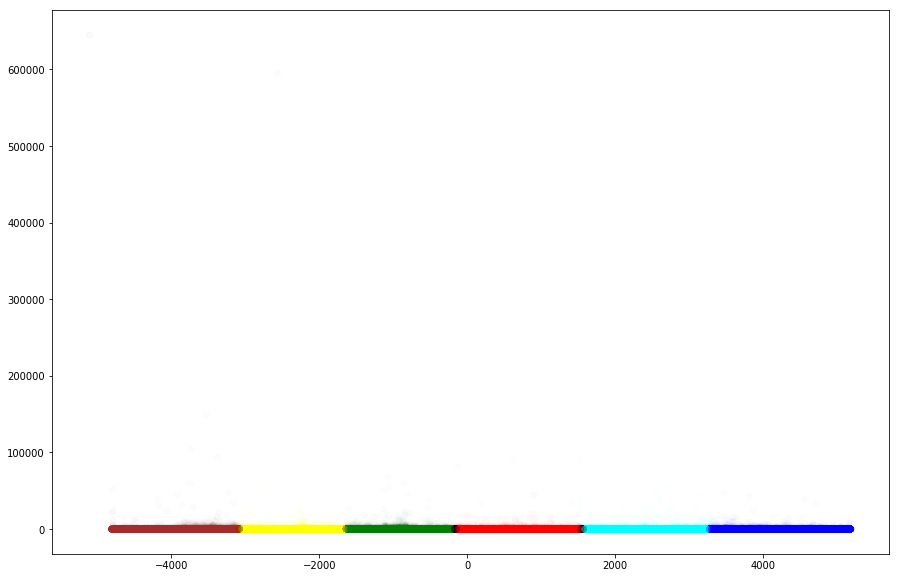

In [34]:
%matplotlib inline
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [35]:
labels = [colors[l_] for l_ in labels]

In [36]:

# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    300327
dtype: int64
blue 0    300637
dtype: int64
yellow 0    432447
dtype: int64
green 0    390030
dtype: int64
purple 0    3
dtype: int64
cyan 0    343550
dtype: int64
brown 0    233006
dtype: int64


# Approach #3 -- Helmert Coding

In [37]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [38]:
# converting all categorcal variable to dummy encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


In [39]:
import category_encoders as ce
encoder = ce.helmert.HelmertEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)
helm_df = encoder.transform(cluster_2016)

In [40]:
helm_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1794,796,115,28.800000
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1574,683,318,27.050000
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6517,422,377,11.216667
3,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,2.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5127,401,437,75.383333
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6984,94,266,8.983333


In [41]:
# To convert the value into numpy array

helm_df = helm_df.iloc[:, 0:].values
helm_df[0]

array([ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
        1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00,  1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00,  1.794e+03,  7.960e+02,  1.150e+02,
        2.880e+01])

In [42]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmeans = KMeans(n_clusters=7, random_state=0,verbose=3).fit(helm_df)
clusters = kmeans.fit_predict(helm_df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 928552716031.9866
start iteration
done sorting
end inner loop
Iteration 1, inertia 897517511182.7295
start iteration
done sorting
end inner loop
Iteration 2, inertia 893594767731.9226
start iteration
done sorting
end inner loop
Iteration 3, inertia 891664023745.0588
start iteration
done sorting
end inner loop
Iteration 4, inertia 889935815281.2753
start iteration
done sorting
end inner loop
Iteration 5, inertia 888324884869.8033
start iteration
done sorting
end inner loop
Iteration 6, inertia 886633468230.3392
start iteration
done sorting
end inner loop
Iteration 7, inertia 884572155108.735
start iteration
done sorting
end inner loop
Iteration 8, inertia 881179736633.3516
start iteration
done sorting
end inner loop
Iteration 9, inertia 877079632534.4471
start iteration
done sorting
end inner loop
Iteration 10, inertia 874372408085.716
start iteration
done sorting
end inner loop
Iteration 11, inerti

Iteration 15, inertia 865878528768.5394
start iteration
done sorting
end inner loop
Iteration 16, inertia 865769032329.4508
start iteration
done sorting
end inner loop
Iteration 17, inertia 865709263697.3313
start iteration
done sorting
end inner loop
Iteration 18, inertia 865670116227.5876
start iteration
done sorting
end inner loop
Iteration 19, inertia 865645504102.6117
start iteration
done sorting
end inner loop
Iteration 20, inertia 865629255842.6736
start iteration
done sorting
end inner loop
Iteration 21, inertia 865613991603.4529
start iteration
done sorting
end inner loop
Iteration 22, inertia 865603372708.9061
start iteration
done sorting
end inner loop
Iteration 23, inertia 865597777391.092
start iteration
done sorting
end inner loop
Iteration 24, inertia 865593680613.8094
start iteration
done sorting
end inner loop
Iteration 25, inertia 865589512389.7142
start iteration
done sorting
end inner loop
Iteration 26, inertia 865585401195.9927
start iteration
done sorting
end inne

start iteration
done sorting
end inner loop
Iteration 0, inertia 976572089821.4095
start iteration
done sorting
end inner loop
Iteration 1, inertia 892362165229.1266
start iteration
done sorting
end inner loop
Iteration 2, inertia 885759762235.004
start iteration
done sorting
end inner loop
Iteration 3, inertia 883696067297.413
start iteration
done sorting
end inner loop
Iteration 4, inertia 882401384417.9891
start iteration
done sorting
end inner loop
Iteration 5, inertia 881962863558.2261
start iteration
done sorting
end inner loop
Iteration 6, inertia 881832083114.8124
start iteration
done sorting
end inner loop
Iteration 7, inertia 881789334723.0616
start iteration
done sorting
end inner loop
Iteration 8, inertia 881778568003.9188
start iteration
done sorting
end inner loop
Iteration 9, inertia 881775851562.7954
center shift 3.372083e+00 within tolerance 1.272616e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1022932018137.0034
start it

Iteration 10, inertia 865341063854.3102
start iteration
done sorting
end inner loop
Iteration 11, inertia 865236601328.3696
start iteration
done sorting
end inner loop
Iteration 12, inertia 865189941855.0042
start iteration
done sorting
end inner loop
Iteration 13, inertia 865166174909.4022
start iteration
done sorting
end inner loop
Iteration 14, inertia 865147286661.4333
start iteration
done sorting
end inner loop
Iteration 15, inertia 865134795814.3992
start iteration
done sorting
end inner loop
Iteration 16, inertia 865127693004.0669
start iteration
done sorting
end inner loop
Iteration 17, inertia 865122746174.262
start iteration
done sorting
end inner loop
Iteration 18, inertia 865119230476.0554
start iteration
done sorting
end inner loop
Iteration 19, inertia 865117629496.0643
center shift 2.578633e+00 within tolerance 1.272616e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 970799558740.7114
start iteration
done sorting
end inner loo

Iteration 15, inertia 927914784487.6427
start iteration
done sorting
end inner loop
Iteration 16, inertia 927891880464.6902
start iteration
done sorting
end inner loop
Iteration 17, inertia 927884251947.5151
start iteration
done sorting
end inner loop
Iteration 18, inertia 927880507612.169
start iteration
done sorting
end inner loop
Iteration 19, inertia 927877718693.8076
center shift 3.158956e+00 within tolerance 1.272616e+01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1376261775407.612
start iteration
done sorting
end inner loop
Iteration 1, inertia 1160622140075.0457
start iteration
done sorting
end inner loop
Iteration 2, inertia 1072862309557.3131
start iteration
done sorting
end inner loop
Iteration 3, inertia 1034574107743.6578
start iteration
done sorting
end inner loop
Iteration 4, inertia 1015768603897.5507
start iteration
done sorting
end inner loop
Iteration 5, inertia 1003447386242.5747
start iteration
done sorting
end inner loo

Iteration 36, inertia 865130433631.5735
start iteration
done sorting
end inner loop
Iteration 37, inertia 865125232322.4037
start iteration
done sorting
end inner loop
Iteration 38, inertia 865121861443.414
start iteration
done sorting
end inner loop
Iteration 39, inertia 865119421227.792
center shift 3.551815e+00 within tolerance 1.272616e+01


In [43]:
# cost in this encoding

kmeans.inertia_

865117006379.0042

In [44]:
# predict all the labels

kmeans.predict(helm_df)

array([0, 0, 1, ..., 0, 3, 6], dtype=int32)

In [45]:
labels = kmeans.predict(helm_df)

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(helm_df)

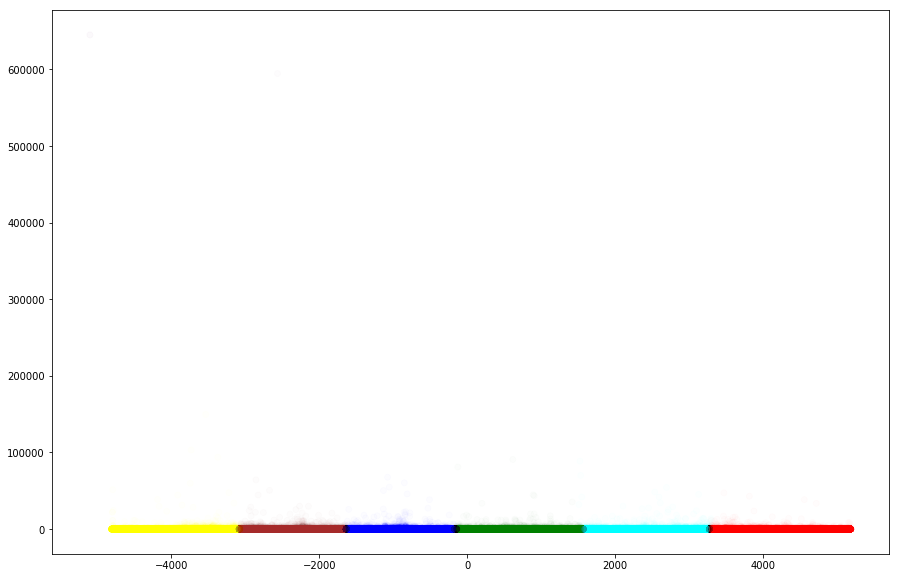

In [47]:
%matplotlib inline
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [48]:
labels = [colors[l_] for l_ in labels]
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    300644
dtype: int64
blue 0    389371
dtype: int64
yellow 0    233170
dtype: int64
green 0    300197
dtype: int64
purple 0    3
dtype: int64
cyan 0    343562
dtype: int64
brown 0    433053
dtype: int64
